In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import special
from matplotlib.patches import Polygon
%matplotlib inline

# Занятие 1. Непрерывные распределения, используемые в математической статистике, их квантили и процентные точки.

## 1.1 
### a) 
$$\Gamma(\frac{1}{2})=\int_0^{+\infty} x^{-\frac{1}{2}}e^{-x}dx=\left\{x=\frac{t^2}{2}; dx=tdt\right\}=\sqrt{2}\int_0^{+\infty} e^{-\frac{x^2}{2}}dx=2\int_0^{+\infty} e^{-x^2}dx=2\cdot\frac{\sqrt{\pi}}{2}=\sqrt{\pi}$$

### б)

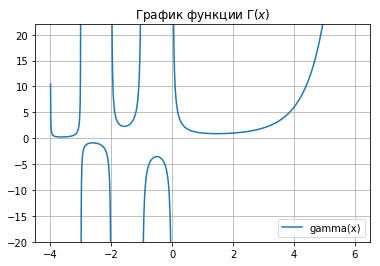

In [2]:
x = np.linspace(-4,6,2501)
y = special.gamma(x)
plt.grid(True)
plt.ylim(-20, 22)
plt.plot(x, y, label='gamma(x)')
plt.legend(loc='lower right')
plt.title('График функции $\Gamma(x)$')
plt.show()

## 1.2

### 1) Плотность нормального закона распределения (Probability density function (PDF)) 
\begin{equation} 
\displaystyle{f(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}},x\in {\Bbb R}} 
\end{equation}

### 2) Функция распределения нормального закона(Cumultative distribution function (CDF))
$$
F(x)=P(X\leqslant x)=\int\limits_{-\infty}^x\,f(t)\,dt
$$

### 3) Функция "выживания" (Survival function (sf))
\begin{equation} 
P(X≥x)=1-P(X<x)=1-F(x)
\end{equation}

### 4) Функция процентной точки (PPF)
Если $x_\alpha$ - процентная точка, то 
\begin{equation} 
P(X≤x_\alpha)=\alpha 
\end{equation}

### 5) Функция обратная к функции выживанию (ISF)
Если $x_\alpha$ - процентная точка, то 
\begin{equation} 
P(X>x_\alpha)=1-\alpha 
\end{equation}

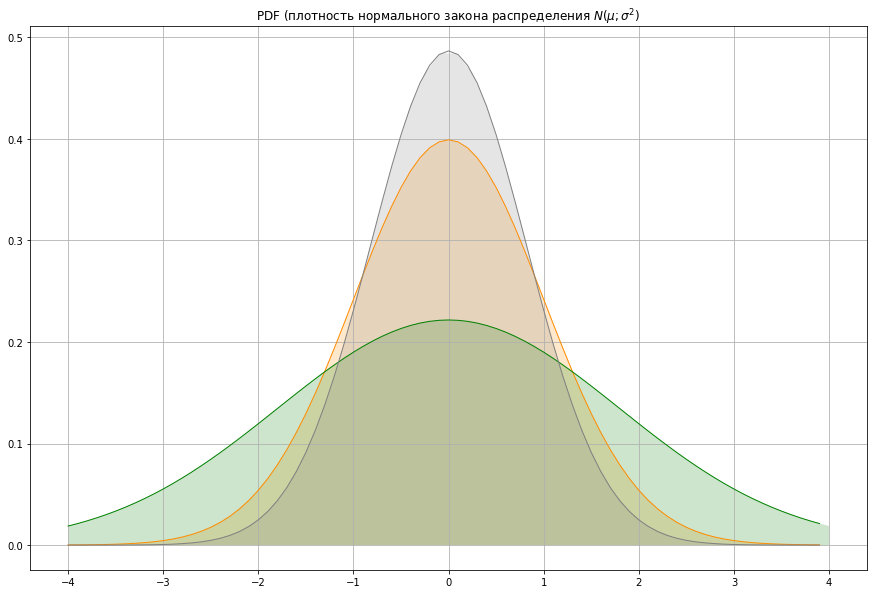

In [11]:
def func(m, sigma, color):
    x = np.arange(-4, 4, 0.1)
    y = stats.norm.pdf(x, m, sigma)
    plt.plot(x, y, color, linewidth=1)
    ix = np.linspace(-4, 4)
    iy = stats.norm.pdf(ix, m, sigma)
    verts = [(-4, 0)] + list(zip(ix, iy)) + [(4, 0)]
    poly = Polygon(verts, facecolor=color, alpha=0.2)
    ax.add_patch(poly)

fig, ax = plt.subplots(figsize= (15, 10))
func(0, 1, 'darkorange')
func(0, 1.8, 'green')
func(0, 0.82, 'gray')
plt.title('PDF (плотность нормального закона распределения $N(\mu;\sigma^2$)')
plt.grid()
plt.show()

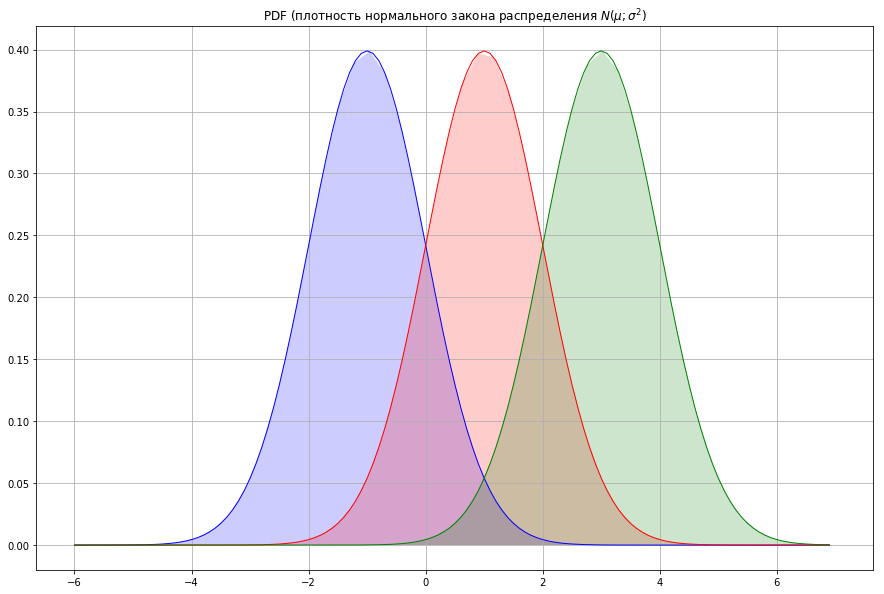

In [16]:
def func(m, sigma, color):
    x = np.arange(-6, 7, 0.1)
    y = stats.norm.pdf(x, m, sigma)
    plt.plot(x, y, color, linewidth=1)
    ix = np.linspace(-6, 7)
    iy = stats.norm.pdf(ix, m, sigma)
    verts = [(-6, 0)] + list(zip(ix, iy)) + [(7, 0)]
    poly = Polygon(verts, facecolor=color, alpha=0.2)
    ax.add_patch(poly)

fig, ax = plt.subplots(figsize=(15, 10))
func(-1, 1, 'blue')
func(1, 1, 'red')
func(3, 1, 'green')
plt.title('PDF (плотность нормального закона распределения $N(\mu;\sigma^2$)')
plt.grid()
plt.show()

## 1.3
### a) Хи квадрат распределение с n степенями свободы.

$\chi^2 \sim \chi^2(n)$, если pdf (плотность распределения вероятности имеет вид) 
\begin{equation} 
\displaystyle{f(x)=\frac{1}{\Gamma(\frac{n}{2})2^\frac{n}{2}}x^{\frac{n}{2}-1}e^{-\frac{x}{2}},x>0} 
\end{equation}
$\chi^2=Z_1^2+Z_2^2+...+Z_n^2$, где $Z_k \sim N(0;1)$ и $n$ показывает количество степеней свободы.

$E(\chi^2)=n; Var(\chi^2)=2n$



### б)

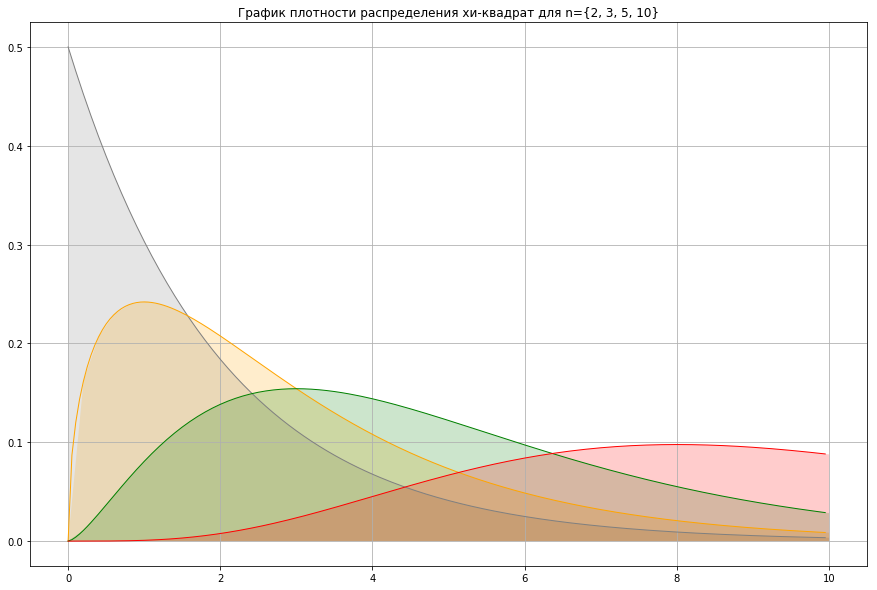

In [19]:
def func(freedom_deg, color):
    x = np.arange(0, 10, 0.05)
    y = stats.chi2.pdf(x, freedom_deg)
    plt.plot(x, y, color, linewidth=1)
    ix = np.linspace(0, 10)
    iy = stats.chi2.pdf(ix, freedom_deg)
    verts = [(0, 0)] + list(zip(ix, iy)) + [(10, 0)]
    poly = Polygon(verts, facecolor=color, alpha=0.2)
    ax.add_patch(poly)

fig, ax = plt.subplots(figsize= (15, 10))
func(2, 'gray')
func(3, 'orange')
func(5, 'green')
func(10, 'red')
plt.title('График плотности распределения хи-квадрат для n={2, 3, 5, 10}')
plt.grid()
plt.show()

### в) 

In [6]:
print(1-stats.chi2(20).cdf(10.9))
print(stats.chi2(20).cdf(28.9))
print(stats.chi2(25).cdf(31.4)-stats.chi2(25).cdf(8.26))

0.9487746849992853
0.9102528687159303
0.8232163182349183


Таким образом, 

$P(\chi_{20}^2>10,9)=0.9487746849992853$, $P(\chi_{20}^2<28,9)=0.9102528687159303$, $P(8,26≤\chi_{25}^2<31,4)=0.8232163182349183$.

### г)

In [31]:
print(stats.chi2(5).isf(0.1))
print(stats.chi2(100).isf(0.01))
print(stats.chi2(18).isf(0.95))
print(stats.chi2(80).isf(0.99))
print()

print(stats.chi2(5).ppf(0.9))
print(stats.chi2(100).ppf(0.99))
print(stats.chi2(18).ppf(0.05))
print(stats.chi2(80).ppf(0.01))

9.236356899781116
135.80672317102676
9.390455080688982
53.54007729107873

9.236356899781118
135.80672317102676
9.390455080688982
53.54007729107873


Таким образом,

$\chi_{0,1}^2(5)=9.236356899781116$, $\chi_{0,01}^2(100)=135.80672317102676$, $\chi_{0,95}^2(18)=9.390455080688982$, $\chi_{0,99}^2(80)=53.54007729107873$

## 1.4
### a и б) Распределение Стьюдента с n степенями свободы

$t \sim t(n)$, если pdf (плотность распределения вероятности имеет вид) 
\begin{equation} 
\displaystyle{f_n(x)=B_n(1+\frac{x^2}{n})^{-\frac{n+1}{2}}}, B_n=\frac{\Gamma(\frac{n+1}{2})}{\sqrt{\pi n}\Gamma(\frac{n}{2})}
\end{equation}
$t=\frac{Z}{\sqrt{\frac{X}{n}}}$, где $Z \sim N(0;1)$, $X \sim \chi^2(n)$ и $n$ показывает количество степеней свободы.

Свойства:

1) $$t(1)=\frac{B_1}{(1+x^2)}=\frac{\Gamma(1)}{\sqrt{\pi}\Gamma(\frac{1}{2})(1+x^2)}=\frac{1}{\pi(1+x^2)}=Co(0;1)$$

2) Если $t \sim t(n)$, то $-t \sim t(n)$

### в)

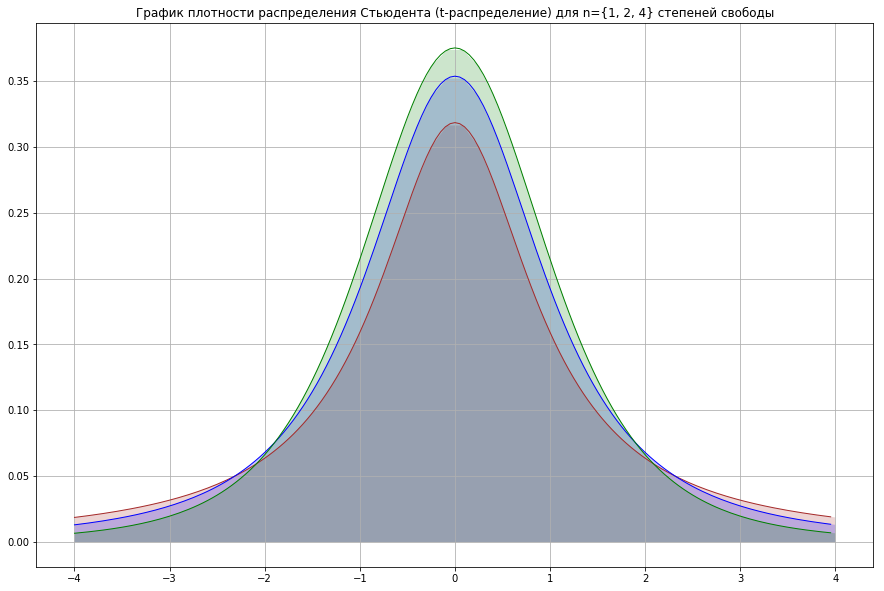

In [30]:
def func(freedom_deg, color):
    x = np.arange(-4, 4, 0.05)
    y = stats.t.pdf(x, freedom_deg)
    plt.plot(x, y, color, linewidth=1)
    ix = np.linspace(-4, 4)
    iy = stats.t.pdf(ix, freedom_deg)
    verts = [(-4, 0)] + list(zip(ix, iy)) + [(4, 0)]
    poly = Polygon(verts, facecolor=color, alpha=0.2)
    ax.add_patch(poly)

fig, ax = plt.subplots(figsize= (15, 10))
func(1, 'brown')
func(2, 'blue')
func(4, 'green')
plt.title('График плотности распределения Стьюдента (t-распределение) для n={1, 2, 4} степеней свободы')
plt.grid()
plt.show()

### г)

In [9]:
print(stats.t(10).cdf(2.23))
print(1-stats.t(10).cdf(-2.23))
print(stats.t(10).cdf(2.23)-stats.t(10).cdf(-2.23))
print(stats.t(10).cdf(3.17)-stats.t(10).cdf(-1.31))
print(1-stats.t(82).cdf(1.96))

0.9750787646106596
0.9750787646106596
0.9501575292213191
0.88526171246222
0.026696216874017575


Таким образом, 

$P(t_{10}<2.23)=0.9750787646106596$, $P(t_{10}>-2.23)=0.9750787646106596$, $P(|t_{10}|<2.23)=0.9501575292213191$, $P(-1.31<t_{10}<3.17)=0.88526171246222$, $P(t_{82}>1.96)=0.026696216874017575$

### д)

In [10]:
print(stats.t(33).isf(0.005))
print(stats.t(23).isf(0.1))
print(stats.t(100).isf(0.05))
print(stats.norm(0,1).isf(0.025))

2.733276642350758
1.3194602391408925
1.6602343260657506
1.9599639845400545


Таким образом, 

$t_{0.005}(33)=2.733276642350758; t_{0.1}(23)=1.3194602391408925; t_{0.05}(100)=1.6602343260657506$

При больших степенях свободы распределение Стьюдента по распределению стремится к стандартному закону распределения, поэтому:
$t_{0.025}(\infty)=1.9599639845400545$

## 1.5
### а и б) Распределение Фишера с n и m степенями свободы

$F \sim F(n;m)$, если pdf (плотность распределения вероятности имеет вид) 
\begin{equation} 
\displaystyle{f(x)=\frac{\Gamma(\frac{m+n}{2})}{\Gamma(\frac{m}{2})\Gamma(\frac{n}{2})}}m^{\frac{m}{2}}n^{\frac{n}{2}}x^{\frac{n-2}{2}}(m+nx)^{-\frac{m+n}{2}}
\end{equation}

$F=\frac{mX}{nY}$, $X \sim \chi^2(n)$;$Y \sim \chi^2(m)$

Свойства распределения Фишера:

1) Если $F \sim F(n;m)$, то $\frac{1}{F} \sim F(m;n)$
$$F_{\frac{1}{F(n,m)}}(x)=P\left(\frac{1}{F}<x\right)=P\left(\frac{1}{\frac{X/n}{Y/m}}<x\right)=P\left(\frac{Y/m}{X/n}<x\right)=F_{F(m,n)}(x)$$

2) Если $F \sim F(n;m)$, то случайная величина $nF ⇒^d \chi^2(n)$, при $m→∞$

3) $E(F)=\frac{m}{m-2}$, если $m>2$

4) $Var(F)=\frac{2m^{2}(m+n-2)}{n(m-2)^{2}(m-4)}$, если $m>4$


### в)

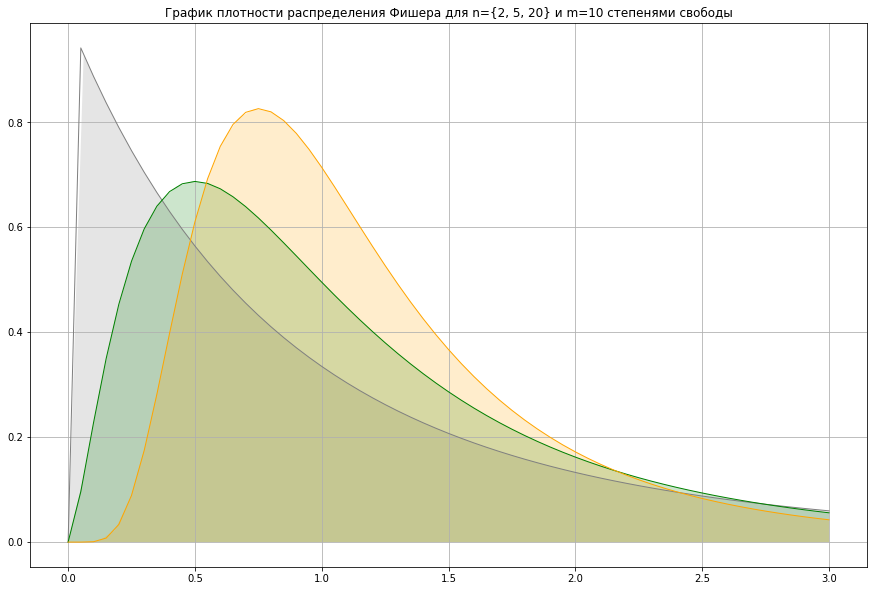

In [39]:
def func(freedom_deg, m, color):
    x = np.arange(-0.0001, 3, 0.05)
    y = stats.f.pdf(x, freedom_deg, m)
    plt.plot(x, y, color, linewidth=1)
    ix = np.linspace(-0.0001, 3)
    iy = stats.f.pdf(ix, freedom_deg, m)
    verts = [(-0.0001, 0)] + list(zip(ix, iy)) + [(3, 0)]
    poly = Polygon(verts, facecolor=color, alpha=0.2)
    ax.add_patch(poly)

fig, ax = plt.subplots(figsize=(15, 10))
func(2, 10, 'gray')
func(5, 10, 'green')
func(20, 10, 'orange')
plt.title('График плотности распределения Фишера для n={2, 5, 20} и m=10 степенями свободы')
plt.grid()
plt.show()

### г)

In [27]:
print(stats.f(3, 16).cdf(3.24) - stats.f(3, 16).cdf(-3.24))
print(1 - stats.f(35, 100).cdf(1.3))

0.9500484960319404
0.1575835371726052


=>

$P(|F_{3;16}|<3.24)=0.9500484960319404$, $P(F_{35;100}>1.3)=0.1575835371726052$

### д)

In [13]:
print(stats.f(3,7).isf(0.05))
print(stats.f(7,3).isf(0.05))
print(stats.f(5,20).isf(0.025))
print(stats.f(300,800).isf(0.05))

4.346831399907815
8.886742955634274
3.289055845680407
1.166967969509093


Таким образом, 

$F_{0.05}(3;7)=4.346831399907815; F_{0.05}(7;3)=8.886742955634274; F_{0.025}(5;20)=3.289055845680407; F_{0.05}(300;800)=1.166967969509093$

## 1.6
### а) Нецентральное распределение Стьюдента 
$$
f_{v,\mu}=\frac{v^{\frac{v}{2}}e^{\left[-\frac{v\mu^2}{2(x^2+v)}\right]}}{\sqrt{\pi}\Gamma(\frac{v}{2})2^{\frac{v-1}{2}}(x^2+v)^{\frac{v+1}{2}}}\int\limits_{0}^{\infty}y^ve^{\left[-\frac{1}{2}(y-\frac{\mu x}{\sqrt{x^2+v}})^2\right]}dy
$$
$$f_{1,0}(x)=\frac{1^\frac{1}{2}e^0}{\sqrt{\pi}\Gamma(\frac{1}{2})2^0(x^2+1)}\int_0^{+\infty} ye^{-\frac{y^2}{2}}dy=\frac{1}{\pi(1+x^2)}$$
Следовательно, $f_{0,1}(x)$ - плотность стандартного распределения Коши.

### б)

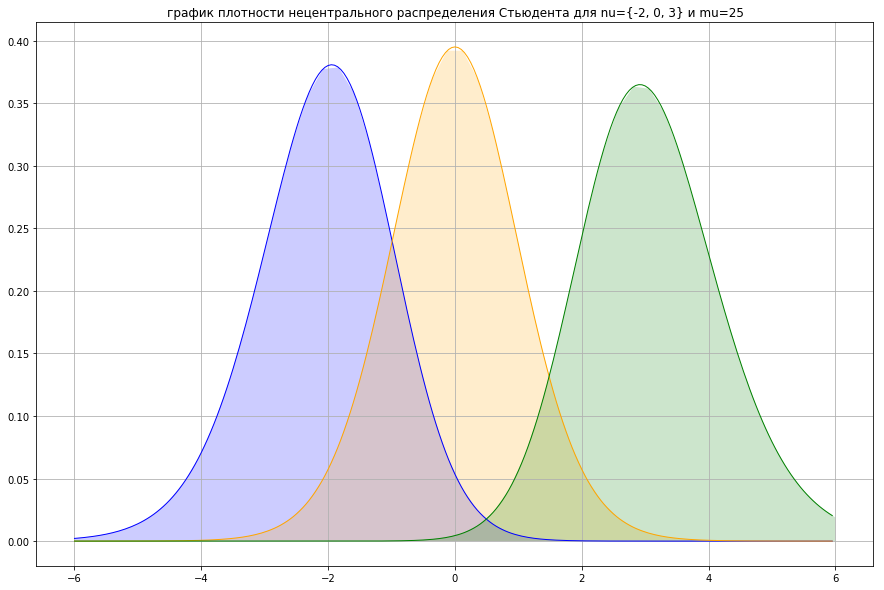

In [43]:
def func(nu, mu, color):
    x = np.arange(-6, 6, 0.05)
    y = stats.nct.pdf(x, mu, nu)
    plt.plot(x, y, color, linewidth=1)
    ix = np.linspace(-6, 6)
    iy = stats.nct.pdf(ix, mu, nu)
    verts = [(-6, 0)] + list(zip(ix, iy)) + [(6, 0)]
    poly = Polygon(verts, facecolor=color, alpha=0.2)
    ax.add_patch(poly)

fig, ax = plt.subplots(figsize= (15, 10))
func(-2, 25, 'blue')
func(0, 25, 'orange')
func(3, 25, 'green')
plt.title('график плотности нецентрального распределения Стьюдента для nu={-2, 0, 3} и mu=25')
plt.grid()
plt.show()

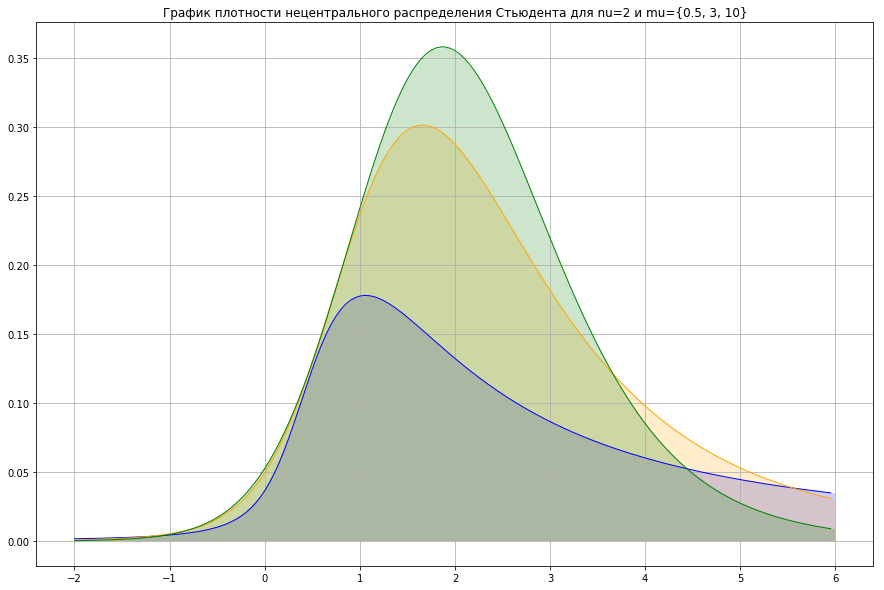

In [45]:
def func(nu, mu, color):
    x = np.arange(-2, 6, 0.05)
    y = stats.nct.pdf(x, mu, nu)
    plt.plot(x, y, color, linewidth=1)
    ix = np.linspace(-2, 6)
    iy = stats.nct.pdf(ix, mu, nu)
    verts = [(-2, 0)] + list(zip(ix, iy)) + [(6, 0)]
    poly = Polygon(verts, facecolor=color, alpha=0.2)
    ax.add_patch(poly)

fig, ax = plt.subplots(figsize= (15, 10))
func(2, 0.5, 'blue')
func(2, 3, 'orange')
func(2, 10, 'green')
plt.title('График плотности нецентрального распределения Стьюдента для nu=2 и mu={0.5, 3, 10}')
plt.grid()
plt.show()

### в)

In [24]:
print(stats.nct(1, 2).ppf(0.2))
print(stats.nct(1, 2).ppf(0.4))
print(stats.nct(1, 2).ppf(0.6))
print(stats.nct(1, 2).ppf(0.8))

1.2215899248890132
2.172735754449371
3.7002164054238436
7.865817055535508


Тогда квантили уровней $q=0.2; 0.4; 0.6; 0.8$ для нецентрального закона Стьюдента с плотностью $f_{0,1}(x)$ будут соответсвенно равны $1.2215899248890132, 2.172735754449371, 3.7002164054238436, 7.865817055535508$.

## 1.7

Пусть $X\sim N(\mu, \sigma^2)$, тогда

$$P(X⩽x_\varepsilon)=\varepsilon$$
$$\frac{1}{2}+\Phi\left(\frac{x_\varepsilon-\mu}{\sigma}\right)=\varepsilon$$
$$\Phi\left(\frac{x_\varepsilon-\mu}{\sigma}\right)=\varepsilon-\frac{1}{2}$$
$$\frac{x_\varepsilon-\mu}{\sigma}=\Phi^{-1}\left(\varepsilon-\frac{1}{2}\right)$$
$$x_\varepsilon=\sigma\cdot\Phi^{-1}\left(\varepsilon-\frac{1}{2}\right)+\mu$$

Рассмотрим квантили $Q_1$ и $Q_3$:
$$Q_1=\sigma\cdot\Phi^{-1}\left(-\frac{1}{4}\right)+\mu=-\sigma\cdot\Phi^{-1}\left(\frac{1}{4}\right)+\mu$$
$$Q_3=\sigma\cdot\Phi^{-1}\left(\frac{1}{4}\right)+\mu$$

Тогда, 
$$\frac{Q_3-Q_1}{\sigma}=\frac{2\sigma\Phi^{-1}\left(\frac{1}{4}\right)}{\sigma}=2\Phi^{-1}\left(\frac{1}{4}\right)≈1.349$$

Проверим это для следующх случайных величин: $X_1\sim N(5,10^2); X_2\sim N(2000,6000^2)$:

In [17]:
(stats.norm(5,10).ppf(3/4)-stats.norm(5,10).ppf(1/4))/10

1.3489795003921636

In [25]:
(stats.norm(2000, 6000).ppf(3/4) - stats.norm(2000, 6000).ppf(1/4))/6000

1.3489795003921632